In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl
    
import sys
sys.path.insert(0, '/home/dhruv/codebase/pyLDLE2/')
sys.path.insert(0, '..')

In [3]:
import numpy as np
from pyLDLE2 import util_, visualize_, datasets, buml_
from scipy.sparse import coo_matrix
from scipy import optimize
from scipy.special import erf, erfinv
from matplotlib import pyplot as plt
from scipy.stats import chi2
from scipy.sparse.linalg import svds
import bx_util
import graphlearning as gl

In [4]:
vis = visualize_.Visualize()

In [5]:
ex_name = '../figures/final_figures/noiseless_annulus_NEW_high_amb'

In [6]:
X0_, labelsMat0, ddX0 = datasets.Datasets().circular_disk_uniform(n=10000, noise=1e-12)

X.shape =  (7837, 3)


In [7]:
r = np.linalg.norm(X0_[:,:2], axis=1)
mask = r > 0.3*np.max(r)
X0 = X0_[mask,:2]
theta = np.arctan2(X0[:,1], X0[:,0])

In [8]:
r0 = r[mask]
ddX = np.minimum(np.max(r) - r0, r0 - 0.3*np.max(r))

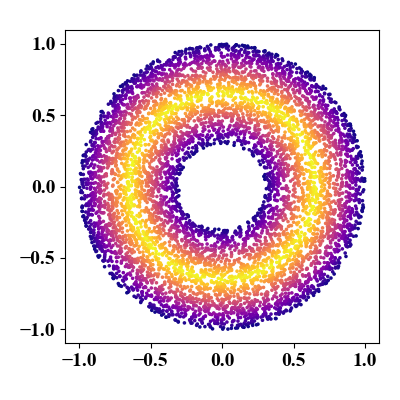

In [9]:
vis.data(X0, ddX, cmap='plasma', figsize=(4,4), s=10, elev=20, azim=-65, title=None)
plt.savefig(ex_name + '_ddX.pdf')

In [10]:
X0.shape

(7076, 2)

In [11]:
m=2000
np.random.seed(42)
O_rand, _, _ = svds(np.random.normal(0,1,(m,2+1)), 2)
X_ = X0.dot(O_rand.T)

In [12]:
X = X_.copy()

In [13]:
np.sum(np.abs(X0 - X.dot(O_rand)))

1.767243794879858e-12

In [14]:
np.sum(np.abs(X - X.dot(O_rand).dot(O_rand.T)))

5.356489119349469e-11

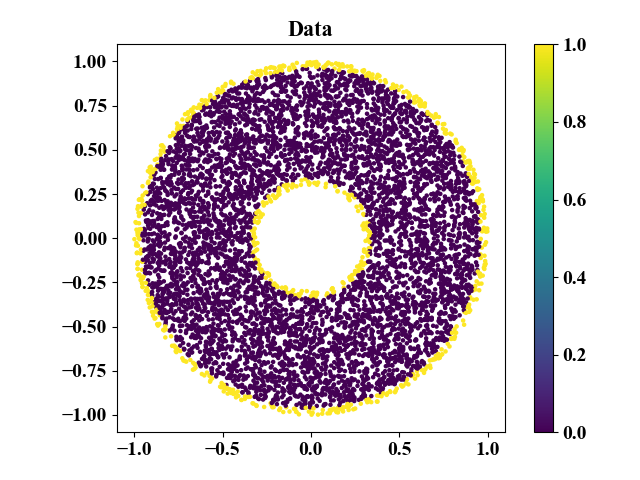

In [15]:
max_prctile = 100*np.sum(ddX<0.04)/len(ddX)
vis.data(X0, ddX<np.percentile(ddX, max_prctile), cmap='viridis', colorbar=True)
plt.savefig(ex_name + '_dX.png')

In [16]:
max_prctile

10.924250989259468

In [17]:
labelsMat = X0

In [18]:
k_nn = 256
bx_CPS = gl.utils.boundary_statistic(X, k_nn, knn=True)

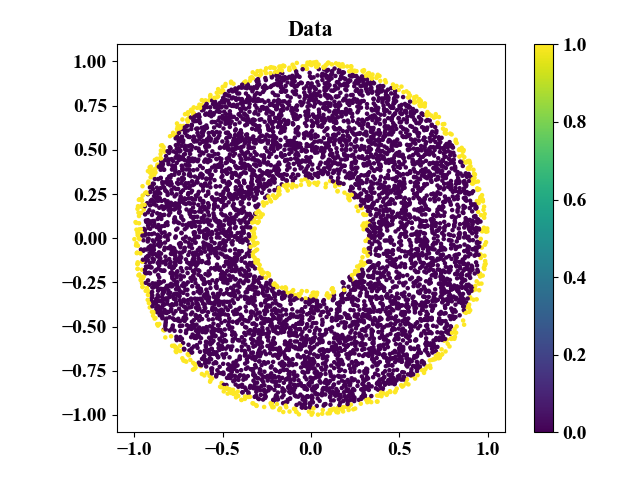

In [19]:
vis.data(labelsMat, bx_CPS<np.percentile(bx_CPS, max_prctile), cmap='viridis', colorbar=True)
plt.show()

In [20]:
opts = bx_util.default_opts.copy()
opts['k_nn'] = 256
opts['h'] = 0.1
opts['local_subspace'] = None
opts['d'] = 2
bx_ds, bx_init_ds, W_ds, D_ds, nu_norm_ds = bx_util.estimate_bx(X, opts=opts)

Error: 0.03615310027415786
Error: 0.0037182576620204966
Error: 0.0004074923520018814
Error: 4.640949590561938e-05
Error: 5.403367164369399e-06
Error: 6.383243440488684e-07
Error: 7.615575814412523e-08
Error: 9.148406032721823e-09
Error: 1.1043576053637594e-09
Error: 1.3378986807310866e-10
Error: 1.625222179058028e-11
Error: 1.979083563696804e-12
Error: 2.4136248555350903e-13
Error: 2.9753977059954195e-14
Error: 4.218847493575595e-15
Error: 8.881784197001252e-16
Sinkhorn converged at iter: 16


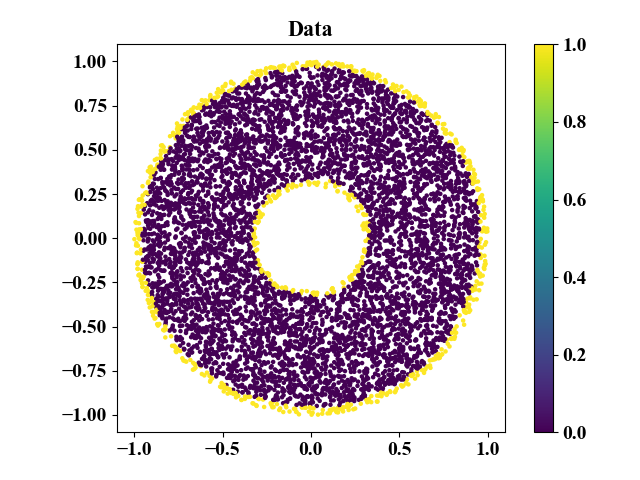

In [21]:
vis.data(labelsMat, bx_ds<np.percentile(bx_ds, max_prctile), cmap='viridis', colorbar=True)
plt.show()

In [ ]:
opts = bx_util.default_opts.copy()
opts['k_nn'] = 256
opts['h'] = 0.1
opts['local_subspace'] = 'local_pca'
opts['d'] = 2
bx_ds_lpca, bx_init_ds_lpca, W_ds_lpca, D_ds_lpca, nu_norm_ds_lpca = bx_util.estimate_bx(X, opts=opts)

Error: 0.03615310027415786
Error: 0.0037182576620204966
Error: 0.0004074923520018814
Error: 4.640949590561938e-05
Error: 5.403367164369399e-06
Error: 6.383243440488684e-07
Error: 7.615575814412523e-08
Error: 9.148406032721823e-09
Error: 1.1043576053637594e-09
Error: 1.3378986807310866e-10
Error: 1.625222179058028e-11
Error: 1.979083563696804e-12
Error: 2.4136248555350903e-13
Error: 2.9753977059954195e-14
Error: 4.218847493575595e-15
Error: 8.881784197001252e-16
Sinkhorn converged at iter: 16


In [ ]:
vis.data(labelsMat, bx_ds_lpca<np.percentile(bx_ds_lpca, max_prctile), cmap='viridis', colorbar=True)
plt.show()

In [ ]:
opts = bx_util.default_opts.copy()
opts['k_nn'] = 256
opts['h'] = 0.1
opts['local_subspace'] = 'local_pca'
bx_berry_sauer_w_lpca, bx_berry_sauer_init_w_lpca, nu_norm_berry_sauer_w_lpca = bx_util.estimate_bx_berry_and_sauer(X, opts=opts)

In [ ]:
vis.data(labelsMat, bx_berry_sauer_w_lpca<np.percentile(bx_berry_sauer_w_lpca, max_prctile), cmap='viridis', colorbar=True)

In [ ]:
opts = bx_util.default_opts.copy()
opts['k_nn'] = 256
opts['h'] = 0.1
bx_berry_sauer, bx_berry_sauer_init, nu_norm_berry_sauer = bx_util.estimate_bx_berry_and_sauer(X, opts=opts)

In [ ]:
vis.data(labelsMat, bx_berry_sauer<np.percentile(bx_berry_sauer, max_prctile), cmap='viridis', colorbar=True)

In [38]:
opts = bx_util.default_opts.copy()
opts['k_nn'] = 256
opts['h'] = 0.1
opts['local_subspace'] = 'local_pca'
opts['d'] = 2
opts['no_newton'] = False
opts['optimizer'] = 'gd'
opts['lr'] = 0.1
opts['reg'] = 0.001
bx_ds_lpca_smooth, bx_init_ds_lpca_smooth, W_ds_lpca_smooth, D_ds_lpca_smooth, nu_norm_ds_lpca_smooth = bx_util.estimate_bx(X, opts=opts)

Error: 0.03615310027415786
Error: 0.0037182576620204966
Error: 0.0004074923520018814
Error: 4.640949590561938e-05
Error: 5.403367164369399e-06
Error: 6.383243440488684e-07
Error: 7.615575814412523e-08
Error: 9.148406032721823e-09
Error: 1.1043576053637594e-09
Error: 1.3378986807310866e-10
Error: 1.625222179058028e-11
Error: 1.979083563696804e-12
Error: 2.4136248555350903e-13
Error: 2.9753977059954195e-14
Error: 4.218847493575595e-15
Error: 8.881784197001252e-16
Sinkhorn converged at iter: 16
Iter: 1 :: loss: 0.06400205529828293
Iter: 2 :: loss: 0.06382997076846175
Iter: 3 :: loss: 0.06365896397000029
Iter: 4 :: loss: 0.0634890241598595
Iter: 5 :: loss: 0.06332014074158501
Iter: 6 :: loss: 0.06315230326277271
Iter: 7 :: loss: 0.06298550141258727
Iter: 8 :: loss: 0.06281972501933235
Iter: 9 :: loss: 0.0626549640480713
Iter: 10 :: loss: 0.062491208598297064
Iter: 11 :: loss: 0.062328448901649944
Iter: 12 :: loss: 0.062166675319682445
Iter: 13 :: loss: 0.06200587834166971
Iter: 14 :: loss:

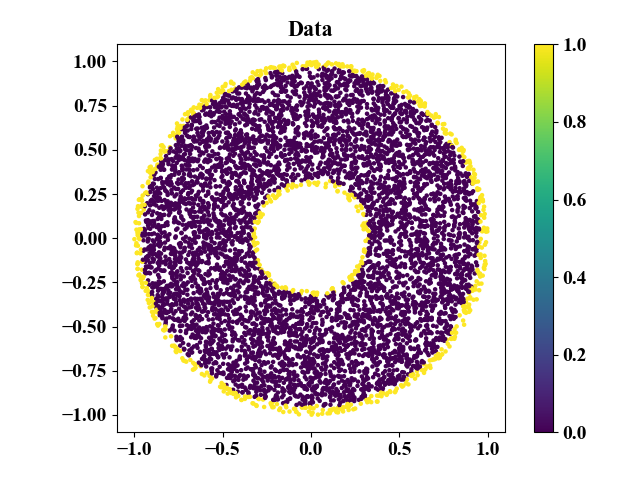

In [39]:
vis.data(labelsMat, bx_ds_lpca_smooth<np.percentile(bx_ds_lpca_smooth, max_prctile), cmap='viridis', colorbar=True)

In [40]:
prctiles = np.arange(2, 14, 1)
jac_ind_bs_lpca = []
jac_ind_bs = []
jac_ind_ds_lpca = []
jac_ind_ds_lpca_smooth = []
jac_ind_ds = []
jac_ind_cps = []

for prctile in prctiles:
    jac_ind_ds_lpca.append(bx_util.compute_jaccard_index(ddX, bx_ds_lpca, prctile))
    jac_ind_ds_lpca_smooth.append(bx_util.compute_jaccard_index(ddX, bx_ds_lpca_smooth, prctile))
    jac_ind_ds.append(bx_util.compute_jaccard_index(ddX, bx_ds, prctile))
    jac_ind_bs_lpca.append(bx_util.compute_jaccard_index(ddX, bx_berry_sauer_w_lpca, prctile))
    jac_ind_bs.append(bx_util.compute_jaccard_index(ddX, bx_berry_sauer, prctile))
    jac_ind_cps.append(bx_util.compute_jaccard_index(ddX, bx_CPS, prctile))

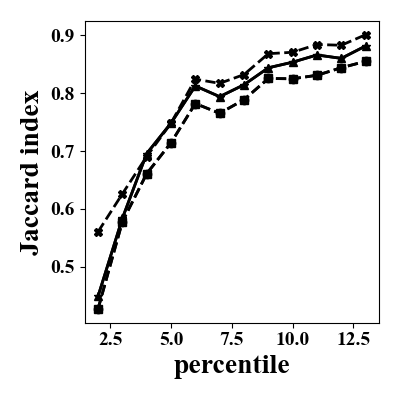

In [66]:
plt.figure(figsize=(4,4))
plt.plot(prctiles, jac_ind_ds_lpca, '-k^', label='DS + LPCA', linewidth=2)
#plt.plot(prctiles, jac_ind_ds_lpca_smooth, '-k>', label='Standard + LPCA + Smooth', linewidth=2)
plt.plot(prctiles, jac_ind_ds, '-k*', label='DS', linewidth=2)
plt.plot(prctiles, jac_ind_bs_lpca, '--ks', label='Standard + LPCA', linewidth=2)
plt.plot(prctiles, jac_ind_bs, '--ko', label='Standard', linewidth=2)
plt.plot(prctiles, jac_ind_cps, '--kX', label='CPS', linewidth=2)
plt.xlabel('percentile', fontsize=20)
plt.ylabel('Jaccard index', fontsize=20)
plt.tight_layout()
#plt.legend(framealpha=0)
plt.savefig(ex_name + '_result_1.png', dpi=400)

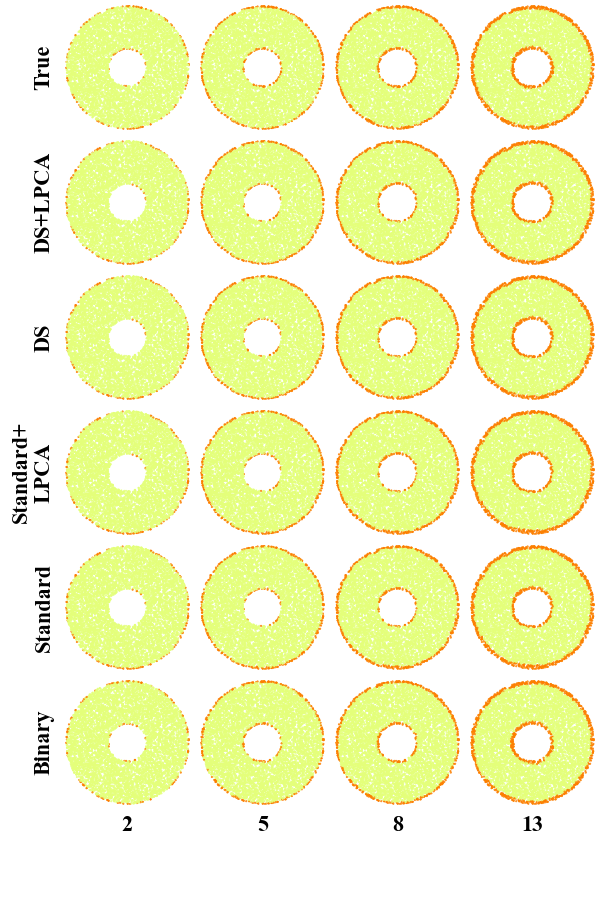

In [67]:
prctiles_ = [prctiles[0]] + prctiles[3:-3:3].tolist() + [prctiles[-1]]
# bx_estimates = [
#     ddX,
#     bx_ds_lpca_smooth,
#     bx_ds_lpca,
#     bx_ds,
#     bx_berry_sauer_w_lpca,
#     bx_berry_sauer,
#     bx_CPS
# ]
# ylabels = ['True', 'DS+LPCA+\nSmooth', 'DS+LPCA', 'DS', 'Standard+\nLPCA', 'Standard', 'Binary']
bx_estimates = [
    ddX,
    bx_ds_lpca,
    bx_ds,
    bx_berry_sauer_w_lpca,
    bx_berry_sauer,
    bx_CPS
]
ylabels = ['True', 'DS+LPCA', 'DS', 'Standard+\nLPCA', 'Standard', 'Binary']
fig_h = 1.5
cmap = 'Wistia'
n_bx_estimates = len(bx_estimates)
n_percentiles = len(prctiles_)
fig, ax = plt.subplots(n_bx_estimates, n_percentiles, figsize=(n_percentiles*fig_h,n_bx_estimates*fig_h))
plt.subplots_adjust(left=0.1, bottom=0.1, right=1, top=1, wspace=0, hspace=0)
for i in range(n_bx_estimates):
    for j in range(n_percentiles):
        thresh = np.percentile(bx_estimates[i], prctiles_[j])
        ax[i,j].scatter(*labelsMat.T, c=bx_estimates[i]<=thresh, cmap=cmap, s=1, vmin=0, vmax=1)
        if j == 0:
            ax[i,j].set_ylabel(ylabels[i])
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].spines[['left', 'right', 'top', 'bottom']].set_visible(False)

for j in range(n_percentiles):
    ax[-1,j].set_xlabel(str(prctiles_[j]))

plt.savefig(ex_name + '_result_2.png', dpi=400)

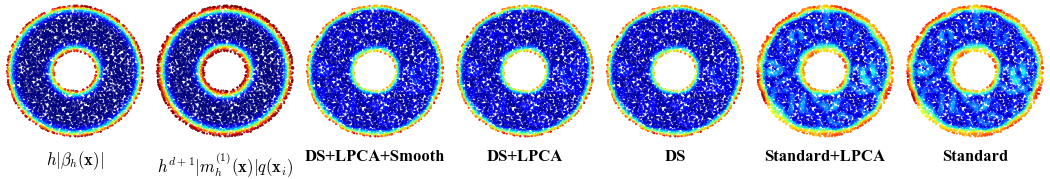

In [64]:
nu_norm_true1 = -opts['h']*bx_util.compute_beta(ddX, opts['h'])
nu_norm_true2 = -(opts['h']**(opts['d']+1))*bx_util.compute_m1(ddX, opts['h'])
nu_norm_estimates = [
    nu_norm_true1,
    nu_norm_true2,
    nu_norm_ds_lpca_smooth,
    nu_norm_ds_lpca,
    nu_norm_ds,
    nu_norm_berry_sauer_w_lpca,
    nu_norm_berry_sauer
]
# xlabels = ['$h\\xi_h(\\mathbf{x})/|m_{h}^{(1)}(\\mathbf{x})|$', '$h^{d+1}|m_h^{(1)}(\\mathbf{x})|q(\\mathbf{x}_i)$',
#            '$\\left\\|\\boldsymbol{\\nu}_i\\right\\|$', '$\\left\\|\\boldsymbol{\\nu}_i\\right\\|_2$ w/o local PCA',
#            '$\\left\\|\\boldsymbol{\\mu}_i\\right\\|$ with local PCA', '$\\left\\|\\boldsymbol{\\mu}_i\\right\\|$']

xlabels = ['$h|\\beta_h(\\mathbf{x})|$', '$h^{d+1}|m_h^{(1)}(\\mathbf{x})|q(\\mathbf{x}_i)$',
           'DS+LPCA+Smooth','DS+LPCA', 'DS',
           'Standard+LPCA', 'Standard']
fig_h = 1.5
n_estimates = len(nu_norm_estimates)
fig, ax = plt.subplots(1, n_estimates, figsize=(n_estimates*fig_h, 1.2*fig_h))
plt.subplots_adjust(left=0, bottom=0.2, right=1, top=1, wspace=0, hspace=0)
for i in range(n_estimates):
    ax[i].scatter(*labelsMat.T, c=nu_norm_estimates[i], cmap='jet', s=1)
    ax[i].set_xlabel(xlabels[i], fontsize=12)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].spines[['left', 'right', 'top', 'bottom']].set_visible(False)
    #ax[i].axis('image')
#plt.tight_layout()
plt.savefig(ex_name + '_result_4.png', dpi=400)